**Titanic Classification**

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [363]:
#reading the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**About the dataset**

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower Survival 0 = No, 1 = Yes embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton sibsp # of siblings / spouses aboard the Titanic parch # of parents / children aboard the Titanic

**Preprocessing of Data**

In [364]:
#checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [365]:
#dropping the cabin is not much effective and null as well
df = df.drop(['Cabin'], axis='columns')

#filling null values of age column as their mean
df['Age'].fillna(df.Age.mean(), inplace=True)

#filling missing values of embarked with their mode
df['Embarked']= df['Embarked'].fillna(df.Embarked.mode, inplace=False)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [366]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Data Exploration**

In [367]:
#To count the no passengers
df.shape

(891, 11)

In [368]:
#To check No of passengers survived and how many did not (0=not survived, 1=survived)
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [369]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [370]:
#dropping columns Name and Ticket as they do not have almost nill relevance in predicting the survival
df=df.drop(columns=["Name","Ticket"],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [371]:
#checking the effect of Fare on the survival of passengers
df.groupby("Fare").mean()

/var/folders/qh/0gr3y4rs1w58xpknzybvhdvm0000gn/T/ipykernel_962/3146612392.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Fare").mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch
Fare,,,,,,
0.0000,516.40,0.066667,1.933333,32.239529,0.00,0.000000
4.0125,379.00,0.000000,3.000000,20.000000,0.00,0.000000
5.0000,873.00,0.000000,1.000000,33.000000,0.00,0.000000
6.2375,327.00,0.000000,3.000000,61.000000,0.00,0.000000
6.4375,844.00,0.000000,3.000000,34.500000,0.00,0.000000
...,...,...,...,...,...,...
227.5250,589.25,0.750000,1.000000,31.924779,0.25,0.000000
247.5208,209.50,0.500000,1.000000,37.000000,0.00,1.000000
262.3750,527.50,1.000000,1.000000,19.500000,2.00,2.000000


We can say that Passengers with higher fare have higher chances of survival

Text(0.5, 1.0, 'passengers survival')

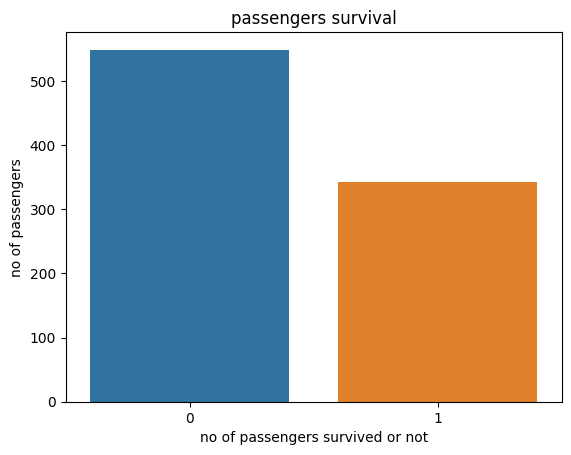

In [372]:
import seaborn as sns
sns.countplot(x="Survived",data=df)
plt.xlabel("no of passengers survived or not")
plt.ylabel("no of passengers")
plt.title("passengers survival")

Text(0.5, 1.0, 'Effect of Sex of passengers on their Survival')

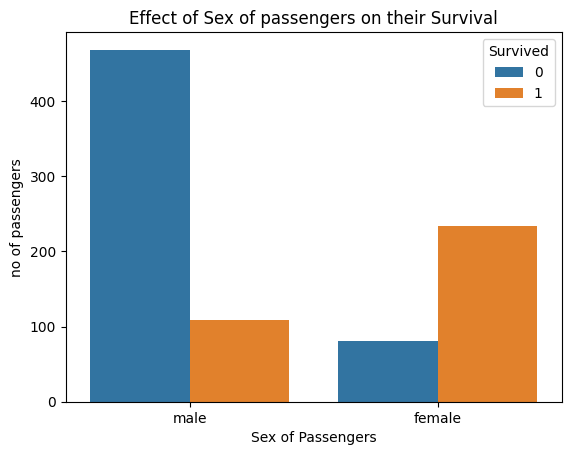

In [373]:
sns.countplot(x="Sex",data=df,hue="Survived")
plt.xlabel("Sex of Passengers")
plt.ylabel("no of passengers")
plt.title("Effect of Sex of passengers on their Survival")

Text(0.5, 1.0, 'Effect of Class of the Passengers on thier survival')

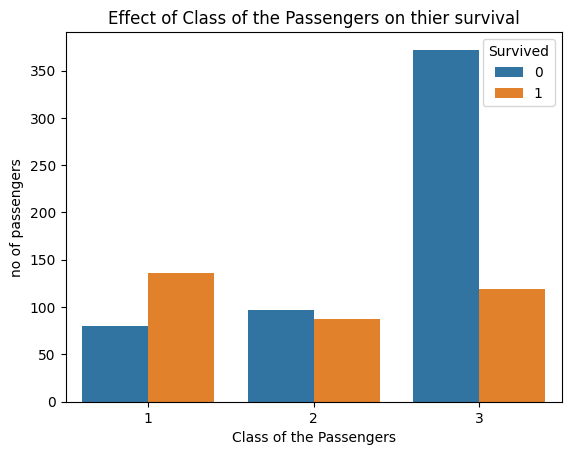

In [374]:
sns.countplot(x="Pclass",data=df,hue='Survived')
plt.xlabel("Class of the Passengers")
plt.ylabel("no of passengers")
plt.title("Effect of Class of the Passengers on thier survival")

Text(0.5, 1.0, 'effect of Port of Embarkation of passenger on survival')

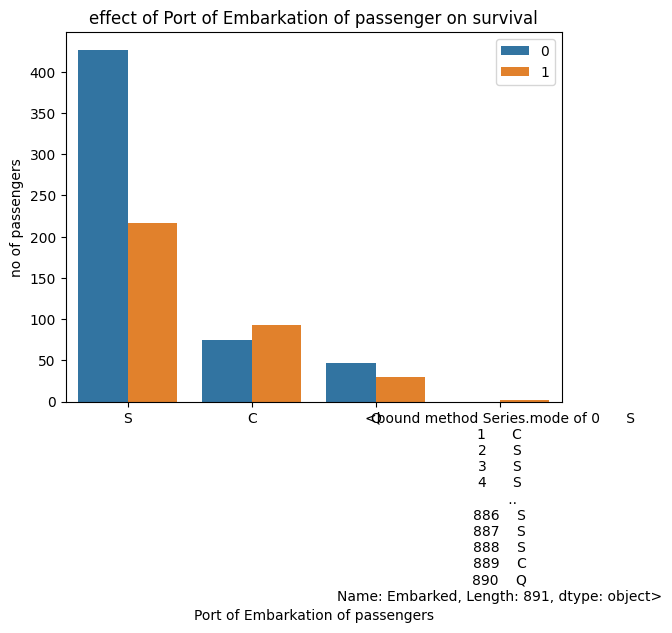

In [375]:
sns.countplot(x="Embarked",data=df, hue="Survived")
plt.xlabel("Port of Embarkation of passengers")
plt.ylabel("no of passengers")
plt.legend()
plt.title("effect of Port of Embarkation of passenger on survival")

**From the following plots we can see that-:**

1.Passengers from 1st and 2nd class had higher Surviaval Rate as compared to 3rd class passengers

2.More Females survived as compared to Males

3.Passengers who embarked from Southampton had low chances of survival

**We will use parameters such as Sex, Fair and Pclass for Training and Survived for training**

In [376]:
#creating dummies for Sex column 
dummies = pd.get_dummies(df['Sex'])
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [377]:
input = df.drop(['Sex'],axis='columns')

In [378]:
input = pd.concat([input,dummies], axis='columns')
input.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,22.0,1,0,7.2500,S,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,1


In [379]:
#dropping less relevant columns 
X=input.drop(columns=["PassengerId","Survived","SibSp","Parch","Age",'Embarked'],axis=1)
y=input.Survived

In [380]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
#we will be using 80% data fro training and 20% of data for Testing 

In [381]:
#importing libraries for the Training and Prediction
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
from sklearn.svm import SVC
model4 = SVC()

In [382]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

SVC()

In [383]:
model1.score(X_test,y_test)

0.8324022346368715

In [384]:
model2.score(X_test,y_test)

0.8212290502793296

In [385]:
model3.score(X_test,y_test)

0.8212290502793296

In [386]:
model4.score(X_test,y_test)

0.6927374301675978